Looking to predict GPS location (lat/lon) using camera images, still trying to see what is the best measure to identify performance of the model.

In [9]:
DIR = 'Street View Images/'
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data
import warnings

warnings.filterwarnings("ignore", category=UserWarning) 

In [10]:
files = [os.path.join(DIR, fname)
        for fname in os.listdir(DIR)]
files = files[:]
files = sorted(files)

In [11]:
imgs = [plt.imread(fname)[..., :3] for fname in files]
imgs = [resize(img_i, (200, 200)) for img_i in imgs]
imgs = np.array(imgs).astype(np.float32)
print("Number of images", len(imgs))

Number of images 113


In [12]:
gps_coords = pd.read_csv('StreetViewGPS.csv')
print("Number of GPS coords", len(gps_coords))

Number of GPS coords 113


GPS data and corresponding image:

 lat                     47.383732
 lon                     8.546212
 yaw_degree            331.600000
 tilt_yaw_degree      -158.470000
 tilt_pitch degree       0.090000
 auxiliary variable      1.000000
Name: 112, dtype: float64


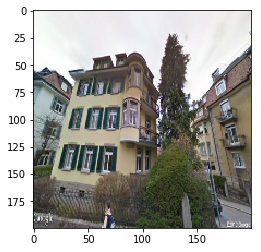

In [13]:
print("GPS data and corresponding image:\n\n", gps_coords.iloc[-1, :].T)
plt.imshow(imgs[-1])
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2))

In [17]:
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer=optimizers.RMSprop(lr=1e-4))

In [18]:
targets = pd.concat([gps_coords.iloc[:,0], gps_coords.iloc[:,1]], axis=1)
inputs = imgs

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
target_scaler = scaler.fit(targets)
targets = target_scaler.transform(targets)
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, random_state=5,
                                                   test_size=0.2)

In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=40,
                              verbose=0, mode='auto')

In [21]:
history = model.fit(x_train, y_train, verbose=2, epochs=275, batch_size=5,
                   validation_data=(x_test, y_test))

Train on 90 samples, validate on 23 samples
Epoch 1/275
4s - loss: 3.2700 - val_loss: 0.1876
Epoch 2/275
0s - loss: 3.8279 - val_loss: 0.4714
Epoch 3/275
0s - loss: 3.1726 - val_loss: 0.3855
Epoch 4/275
0s - loss: 2.9645 - val_loss: 0.6680
Epoch 5/275
0s - loss: 2.6946 - val_loss: 1.0858
Epoch 6/275
0s - loss: 2.5433 - val_loss: 0.4214
Epoch 7/275
0s - loss: 3.0086 - val_loss: 1.2782
Epoch 8/275
0s - loss: 2.4487 - val_loss: 0.2525
Epoch 9/275
0s - loss: 2.6731 - val_loss: 0.3385
Epoch 10/275
0s - loss: 2.6716 - val_loss: 0.7902
Epoch 11/275
0s - loss: 2.1786 - val_loss: 0.6431
Epoch 12/275
0s - loss: 2.2376 - val_loss: 1.2494
Epoch 13/275
0s - loss: 2.0707 - val_loss: 0.1669
Epoch 14/275
0s - loss: 1.9992 - val_loss: 0.8949
Epoch 15/275
0s - loss: 2.2999 - val_loss: 0.6428
Epoch 16/275
0s - loss: 2.3180 - val_loss: 1.8247
Epoch 17/275
0s - loss: 2.4005 - val_loss: 0.4980
Epoch 18/275
0s - loss: 2.1801 - val_loss: 2.1204
Epoch 19/275
0s - loss: 2.1174 - val_loss: 6.0033
Epoch 20/275
0s

0s - loss: 0.3988 - val_loss: 0.2524
Epoch 164/275
0s - loss: 0.3494 - val_loss: 0.3121
Epoch 165/275
0s - loss: 0.4251 - val_loss: 0.2594
Epoch 166/275
0s - loss: 0.3589 - val_loss: 0.2591
Epoch 167/275
0s - loss: 0.4094 - val_loss: 0.2949
Epoch 168/275
0s - loss: 0.3881 - val_loss: 0.2540
Epoch 169/275
0s - loss: 0.3615 - val_loss: 0.3022
Epoch 170/275
0s - loss: 0.4219 - val_loss: 0.2926
Epoch 171/275
0s - loss: 0.3565 - val_loss: 0.2531
Epoch 172/275
0s - loss: 0.3888 - val_loss: 0.2516
Epoch 173/275
0s - loss: 0.3240 - val_loss: 0.1724
Epoch 174/275
0s - loss: 0.4108 - val_loss: 0.3054
Epoch 175/275
0s - loss: 0.3390 - val_loss: 0.2184
Epoch 176/275
0s - loss: 0.2916 - val_loss: 0.2189
Epoch 177/275
0s - loss: 0.2924 - val_loss: 0.1907
Epoch 178/275
0s - loss: 0.3375 - val_loss: 0.1978
Epoch 179/275
0s - loss: 0.2852 - val_loss: 0.2387
Epoch 180/275
0s - loss: 0.3756 - val_loss: 0.3059
Epoch 181/275
0s - loss: 0.3753 - val_loss: 0.4367
Epoch 182/275
0s - loss: 0.2911 - val_loss: 0

In [23]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


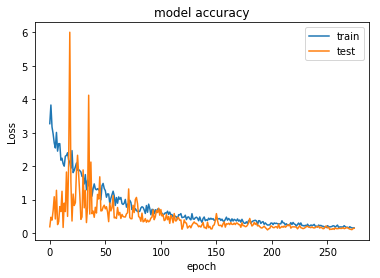

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
target_1 = targets[0].reshape(1,2)

In [50]:
pred = model.predict(np.reshape(imgs[-1], (1,200,200,3)))
pred = target_scaler.inverse_transform(pred)
target_1 = target_scaler.inverse_transform(target_1)
print("MSE: ", (mean_squared_error(target_1, pred)))

MSE:  6.3289089751e-07


Still some room for improvement, in real world terms the predictions are still far off, but is a good start.

In [51]:
comparison = np.concatenate((pred, target_1), axis=1)
comparison = pd.DataFrame(comparison)
comparison.columns = ['Predicted latitude', 'Predicted longitude', 'True latitude', 'True longitude']
comparison

,Predicted latitude,Predicted longitude,True latitude,True longitude
0,47.383778,8.544065,47.384345,8.545037


In [87]:
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) 

Distance in meters between predicted position and real position, note distance function returns distance in kilometers.

In [88]:
distance = distance(comparison['Predicted latitude'], comparison['Predicted longitude'], comparison['True latitude'], comparison['True longitude'])

In [89]:
distance = distance * 1000
print("Prediction error in metres: ", distance)

Prediction error in metres:  96.59401770199551
